<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend openpyxl

Đã làm sạch dữ liệu xong.
Đang xử lý dữ liệu nước Đức...
Đã xóa cột POSTAGE.

--- Tìm thấy 59 tập phổ biến (Top 5) ---
    support                        itemsets
0  0.102845        (6 RIBBONS RUSTIC CHARM)
1  0.070022     (ALARM CLOCK BAKELIKE PINK)
2  0.065646   (CHARLOTTE BAG APPLES DESIGN)
3  0.050328  (CHILDRENS CUTLERY DOLLY GIRL)
4  0.061269      (COFFEE MUG APPLES DESIGN)

--- Tìm thấy 8 luật kết hợp (Top 5) ---
                            antecedents                           consequents  \
0       (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)   
1            (PLASTERS IN TIN SPACEBOY)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2    (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3         (RED RETROSPOT CHARLOTTE BAG)              (WOODLAND CHARLOTTE BAG)   
4  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   

    support  confidence      lift  
0  0.067834    0.584906  4.242887  
1  0.061269    0.

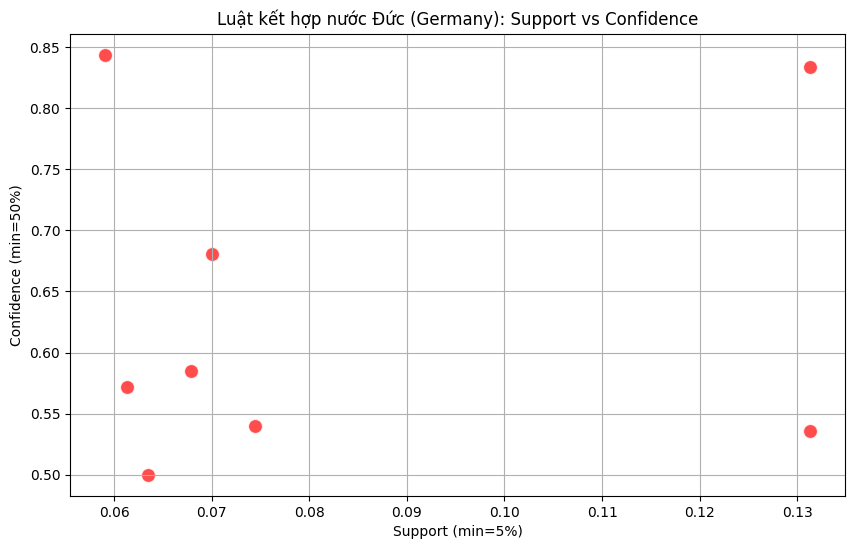

In [3]:
print("Nguyễn Đức Trung _ 6351071072")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

print("Đang đọc dữ liệu...")
df = pd.read_excel('Online Retail.xlsx')

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

print("Đã làm sạch dữ liệu xong.")

print("Đang xử lý dữ liệu nước Đức...")
basket_germany = (df[df['Country'] == "Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_germany_sets = basket_germany.applymap(encode_units)

if 'POSTAGE' in basket_germany_sets.columns:
    basket_germany_sets.drop('POSTAGE', inplace=True, axis=1)
    print("Đã xóa cột POSTAGE.")

frequent_itemsets = apriori(basket_germany_sets, min_support=0.05, use_colnames=True)

print(f"\n--- Tìm thấy {len(frequent_itemsets)} tập phổ biến (Top 5) ---")
print(frequent_itemsets.head())

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(f"\n--- Tìm thấy {len(rules)} luật kết hợp (Top 5) ---")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, s=100, color='red', alpha=0.7)
plt.title("Luật kết hợp nước Đức (Germany): Support vs Confidence")
plt.xlabel("Support (min=5%)")
plt.ylabel("Confidence (min=50%)")
plt.grid(True)
plt.show()